In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np

### 2 node network real solar data

216.0 487.0 -666.0 860
136.5 402.0 -785.5


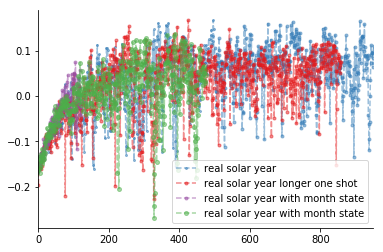

In [229]:
with open('tmp/rewardjyxgi_realsolar_2node_fullyear_bignetwork.json') as f:
    rewardtrace = json.load(f)
with open('tmp/rewardjyxgi_realsolar_2node_fullyear_additional250episodes_epsiloninit0.1.json') as f:
    second_bout = json.load(f)
with open('tmp/rewardjyxgi_realsolar_2node_fullyear_secondadditional250episodes_epsiloninit0.1.json') as f:
    third_bout = json.load(f)
with open('tmp/rewardspoxo_realsolar_2node_fullyear_1000episodes_32experiencereplay.json') as f:
    oneshot = json.load(f)
with open('tmp/rewardxadde_realsolar_2node_fullyear_1000episodes_8experiencereplay.json') as f:
    oneshot8 = json.load(f)
with open('tmp/rewardfpdnp_2node_fullyear_monthinstatespace_replay8.json') as f:
    withseason = json.load(f)
with open('tmp/rewardjxqsi_2node_fullyear_monthinstatespace_replay8.json') as f:
    withseason2 = json.load(f)
fig, ax = plt.subplots(1)
one = len(rewardtrace['data'])
two = len(second_bout['data'])
three = len(third_bout['data'])
ax.plot([i/(365*8) for i in rewardtrace['data'][1::]], label='real solar year',
        alpha=0.5, marker='o', linestyle='--', markersize=2,c ='#377eb8')
ax.plot(range(one, one+two-1),[i/(365*8) for i in second_bout['data'][1::]],
        alpha=0.5, marker='o', linestyle='--', markersize=3,c='#377eb8')
ax.plot(range(one+two, one+two+three-1),[i/(365*8) for i in third_bout['data'][1::]],
        alpha=0.5, marker='o', linestyle='--', markersize=3,c='#377eb8')
ax.plot([i/(365*8) for i in oneshot8['data'][1::]], label='real solar year longer one shot',
        alpha=0.5, marker='o', linestyle='--', markersize=3,c='#e41a1c')
ax.plot([i/(365*8) for i in withseason['data'][1::]], label='real solar year with month state',
        alpha=0.5, marker='o', linestyle='--', markersize=3,c='#984ea3')
ax.plot([i/(365*8) for i in withseason2['data'][1::]], label='real solar year with month state',
        alpha=0.5, marker='o', linestyle='--', markersize=4,c="#4daf4a")
sns.despine()
ax.set_xlim([0,950])
ax.legend(loc='lower right')
#print(max(rewardtrace['data']), max(third_bout['data']), len(third_bout['data']))
print(oneshot8['data'][-1], max(oneshot8['data']), min(oneshot8['data'][100::]), len(oneshot8['data']))
print(withseason2['data'][-1], max(withseason2['data'][1::]), min(withseason2['data'][100::]))

### 4 node network stationary solar

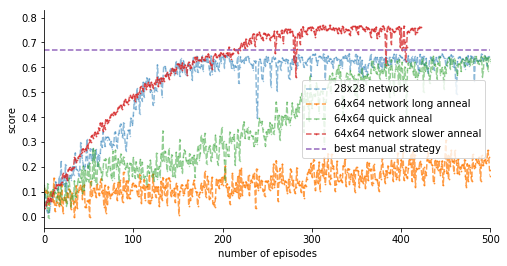

In [66]:
with open('tmp/rewardpavor_500_episodes_ddq_4nodes_slowerlearning.json') as f:
    trace = json.load(f)
with open('tmp/rewardarcyn_5000_episodes_month.json') as f:
    trace2 = json.load(f)
with open('tmp/rewardaeixz_fastdecayandslowlearning_bigger.json') as f:
    trace3 = json.load(f)
with open('tmp/rewardkcgdm_0.99995_decayrate.json') as f:
    trace4 = json.load(f)
with open('tmp/rewardtofyb_full year.json') as f:
    trace5 = json.load(f)
fig, ax = plt.subplots(1)
fig.set_size_inches(8,4)
ax.plot([i/(28*8) for i in trace['data'][1::]], label='28x28 network',
        alpha=0.5, marker='o', linestyle='--', markersize=0.4)
ax.plot([i/(28*8) for i in trace2['data'][1::]], label='64x64 network long anneal',
        alpha=0.75, marker='o', linestyle='--', markersize=0.8)
ax.plot([i/(28*8) for i in trace3['data'][1::]], label='64x64 quick anneal', 
        alpha=0.5, marker='o', linestyle='--', markersize=0.4)
#ax.plot([i/(28*8) for i in trace4['data'][1::]], label='bigger network slower anneal',
#        alpha=0.5, marker='o', linestyle='--', markersize=0.4)
ax.plot([i/(365*8) for i in trace5['data'][1::]], label='64x64 network slower anneal', 
        alpha=0.75, marker='o', linestyle='--', markersize=0.8)
ax.plot([0,5000],[150/(28*8), 150/(28*8)], label='best manual strategy', linestyle='--')
#ax.plot(trace4['data'][1::], label='not trimmed q learning with time')
ax.set_xlim([0,500])
ax.set_xlabel('number of episodes')
ax.set_ylabel('score')
ax.legend(loc='best')
sns.despine()


[0, 8, 16, 24, 32]


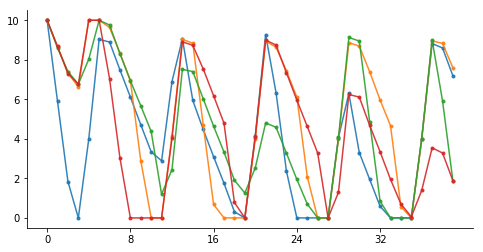

In [67]:
with open('tmp/arcyn_5000_episodes_month.json') as f:
    statetracelearned = json.load(f)
with open('tmp/iwdsk_testing_idealised_4node_28days_naive.json') as f:
    statetracenaive = json.load(f)
def plotone(statetrace):
    run=2
    startday = 0
    periods = 8#in three hours 8 periods make a full day
    duration =5#days
    select = [startday*periods,(startday+duration)*periods]
    fulldata = statetrace['data'][run]
    data = statetrace['data'][run][select[0]:select[1]]
    xs = list(range(len(fulldata)))[select[0]:select[1]]
    #fig, (ax1,ax2) = plt.subplots(1,2)
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8,4)
    for sensor in ['S0','S1','S2','S3']:
        ax1.plot(xs, [i[sensor][1] for i in data], linestyle='-', marker='o', markersize=3, alpha=0.9)
    #ax1.set_xticklabels = [str(int(i) % 8) for i in ax1.get_xticks()]
    #sns.despine()
    count_on = lambda d: sum([v[0]!=2 for k,v in d.items()])
    #ax2.plot(xs, [count_on(i) for i in data])
    ticks = [i for i in range(select[0], select[1]) if i%8==0]
    print(ticks)
    ax1.set_xticks(ticks)
    #values = [i%8 for i in ax1.get_xticks().tolist()] 
    #ax1.set_xticklabels(values)
    sns.despine()
    return fig,ax1
fig = plotone(statetracenaive)

[0, 8, 16, 24, 32]


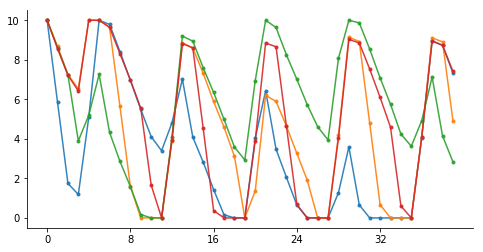

In [68]:
fig = plotone(statetracelearned)

[15840, 16320]


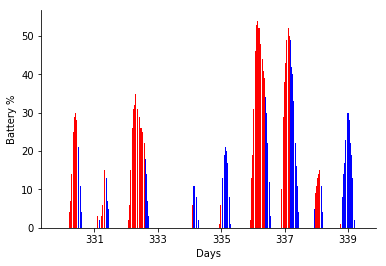

In [18]:
#with open('tmp/dtoei_testingonunseenyear.json') as f:
fig, ax = plt.subplots(1)
def test(i):
    i['S0'][0]==2
def get_plottable(i):
    return i['S0'][1]
sensor = 'S1'
batts = np.array([i[sensor][1] for i in data], dtype=float)
statuses =  np.array([i[sensor][0] for i in data])
onbatts = np.copy(batts)
offbatts = np.copy(batts)
offbatts[statuses!=2] = np.nan
onbatts[statuses==2] = np.nan
ax.bar(xs,onbatts,color='b')
ax.bar(xs,offbatts,color='r')
#ax.plot(offbatts, c='r')
#ax.plot(get_plottable(data))
#ax.set_xlim([0,337])
ax.set_ylabel('Battery %')
ax.set_xticklabels([int(x/48) for x in ax.get_xticks()])
ax.set_xlabel('Days')
ax.set_ylabel('Battery %')
sns.despine()

In [51]:
#debugging


144

In [17]:
import solar_sensor_env,math

In [18]:
step_number = solar_sensor_env.random_start_generator(3)
print(step_number)

2472


In [19]:
day_number = math.floor(step_number/(24/3))

In [25]:
day_number

309

In [21]:
2472/8

309.0

In [27]:
season_number = math.floor(day_number/30)

In [28]:
season_number

10

In [29]:
309/12

25.75

In [31]:
365/31

11.774193548387096

In [62]:
import calendar

In [63]:
monthdays = [calendar.monthrange(2018,i)[1] for i in range(1,13)]

In [67]:
cumulative = np.cumsum(monthdays)
withzero = [0]+list(cumulative)
list(zip(cumulative, cumulative[1::]))

[(31, 59),
 (59, 90),
 (90, 120),
 (120, 151),
 (151, 181),
 (181, 212),
 (212, 243),
 (243, 273),
 (273, 304),
 (304, 334),
 (334, 365)]

In [72]:
def daynumber_to_monthnumber(daynumber):
    monthdays = [calendar.monthrange(2018,i)[1] for i in range(1,13)]
    cumulative = np.cumsum(monthdays)
    cumulative = [0]+list(cumulative)
    monthpairs = zip(cumulative, cumulative[1::])
    return next(idx for idx, el in enumerate(monthpairs) if daynumber in range(*el))

In [75]:
daynumber_to_monthnumber(32)

1